In [6]:
import pandas as pd
import xml.etree.ElementTree as ET
import psycopg2
from datetime import datetime
import re
import cx_Oracle
# Database connection parameters
db_params = {
    "host": "gc-ue4-psql-cspo-dev01.nonprod.gcp.cswg.com",
    "database": "CSPODB",
    "port": 5432,
    "user": "cspoms",
    "password": "cspoms",
    "sslmode": "verify-ca",
    "sslcert": "D:\\W\\RELEX\\RELEX\\CSPOMS_DEV_Conn\\client-cert.pem",
    "sslkey": "D:\\W\\RELEX\\RELEX\\CSPOMS_DEV_Conn\\client-key.pem",
    "sslrootcert": "D:\\W\\RELEX\\RELEX\\CSPOMS_DEV_Conn\\server-ca.pem"
}

post_conn = psycopg2.connect(**db_params)
post_cur = post_conn.cursor()

In [30]:
import datetime 
import pytz
import pandas as pd

text_data_path = 'D:\\W\\RELEX\\RELEX\\I1674 - Po recon\\RECON_PO.IN600.20230227230124'

# Define positions for slicing each line into tuples
[(0, 6), (6, 9), (9, 15), (15, 21), (21, 27), (27, 28), (28, 30), (30, 32), (32, 33), (33, 34), (34, 37), (37, 45), (45, 46), (46, 80)]
# Open the file and read its content
with open(text_data_path, 'r', encoding='utf-8') as file:
    text_data = file.read()
def process_text_data(text_data, positions):
    # List to store extracted data as tuples
    extracted_data = []

    try:
        for line in text_data.split('\n'):
            try:
                # Slice each line based on positions and create a tuple
                line_data = tuple(line[start:end].strip() for start, end in positions)

                # Check if the tuple is not empty (contains at least one non-blank element)
                if any(field for field in line_data):
                    # Append the tuple to the list
                    extracted_data.append(line_data)

            except Exception as e:
                print(f"Error processing line: {line}. Exception: {e}")

    except Exception as e:
        print(f"Error processing text data. Error: {str(e)}")

    # Return the list of tuples
    return extracted_data


result = process_text_data(text_data, positions)
# print(result)
# Convert the list of tuples to a DataFrame with custom column names
df = pd.DataFrame(result, columns=[
    'PO_NUM', 'FACILITY', 'ORDER_DATE', 'VENDOR_NUM', 'DUE_DATE',
    'PERISH_PO', 'PO_TYPE', 'BIC_BUYER_ID', 'PO_RECEIVED', 'PULLBACK_FLAG',
    'PO_OSS_DEST', 'SECONDARY_PO', 'RECON_ORIGIN', 'FILLER'
])

# Display the DataFrame
print(df)

# Specify the table name
table_name = 'cspoms.XXPO_PO_RECON_INBOUND_STG'

request_id = 111

file_name = 'OracleIN600'
utc_now = datetime.datetime.now(datetime.timezone.utc)
# Convert UTC time to EST
est = pytz.timezone('America/New_York')
est_time = utc_now.astimezone(est).strftime("%Y-%m-%d %H:%M:%S")
df['file_name'] = file_name
df['created_by'] = "CSPOMS"
df['creation_date'] = est_time
df['last_updated_by'] = "CSPOMS"
df['last_update_date'] = est_time
df['request_id'] = request_id
df['process_status'] = "N"

fields = [col for col in df.columns]
print(fields)
str_sub = ', '.join(['%s'] * len(fields))
insert_query = f"INSERT INTO {table_name} ({', '.join(fields)}) VALUES ({str_sub})"
print("query_stg::", insert_query)
# Convert the DataFrame to a list of tuples for bulk insertion
df.replace('', None, inplace=True)
df['PO_OSS_DEST'].replace('',None,inplace=True)
df['PO_OSS_DEST'] = pd.to_numeric(df['PO_OSS_DEST'], errors='coerce')

# PO_NUM, FACILITY, ORDER_DATE, VENDOR_NUM, DUE_DATE, PERISH_PO, PO_TYPE, BIC_BUYER_ID, PO_RECEIVED, PULLBACK_FLAG, PO_OSS_DEST, SECONDARY_PO, RECON_ORIGIN, FILLER, file_name, created_by, creation_date, last_updated_by, last_update_date, request_id, process_status) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
data_tuples = [tuple(row) for row in df.itertuples(index=False, name=None)]
print(data_tuples)


# Execute the INSERT statement with the data
post_cur.executemany(insert_query, data_tuples)
count = post_cur.rowcount

print(f'INSERTED {count} EXCEL RECORDS TO {table_name} TABLE')


      PO_NUM FACILITY ORDER_DATE VENDOR_NUM DUE_DATE PERISH_PO PO_TYPE  \
0     815966      904     220801     137693   230228         N           
1     245345      252     221010       4282   230316         N           
2     251735      905     221012     101046   230308         N           
3     255347      252     221014       3780   230303         N           
4     258466      252     221017       3067   230302         N           
...      ...      ...        ...        ...      ...       ...     ...   
3170  165986      302     230227       4157   230309         Y           
3171  165985      302     230227       9281   230303         Y           
3172  165987      302     230227      15326   230303         Y           
3173  506455      904     230227     161350   230309         N           
3174  506456      904     230227     389634   230306         N           

     BIC_BUYER_ID PO_RECEIVED PULLBACK_FLAG PO_OSS_DEST SECONDARY_PO  \
0              JZ                      

NumericValueOutOfRange: integer out of range


In [5]:
# pip install df2pdf
pip install reportlab


SyntaxError: invalid syntax (<ipython-input-5-81388e42d4e6>, line 2)

In [6]:
pip install reportlab


   ---------------------------------------- 1.9/1.9 MB 749.1 kB/s eta 0:00:00



DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


   ---------------------------------------- 2.6/2.6 MB 1.2 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.2.0
    Uninstalling Pillow-8.2.0:
      Successfully uninstalled Pillow-8.2.0


In [1]:
import pandas as pd
from df2pdf import df2pdf

# Convert DataFrame to PDF
df2pdf.export_df2pdf(df, 'output.pdf', title='DataFrame to PDF')

ModuleNotFoundError: No module named 'df2pdf'

In [3]:
# Define positions for slicing each line into tuples
lengths = [
    6,3,6,6,6,1,2,2,1,1,3,8,1,34
]



# Calculate the end positions based on the lengths
end_positions = [sum(lengths[:i + 1]) for i in range(len(lengths))]

# Create positions as tuples of start and end positions
positions = [(start, end) for start, end in zip([0] + end_positions, end_positions)]

print(positions)


[(0, 6), (6, 9), (9, 15), (15, 21), (21, 27), (27, 28), (28, 30), (30, 32), (32, 33), (33, 34), (34, 37), (37, 45), (45, 46), (46, 80)]


In [9]:
import pandas as pd
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle

def df_to_pdf(df, filename, title='DataFrame to PDF'):
    # Create a PDF document
    pdf = SimpleDocTemplate(filename, pagesize=letter)

    # Set title
    title_style = ('Helvetica', 16)
    pdf_title = Table([[title]])
    pdf_title.setStyle([('FONT', title_style)])
    
    # Convert DataFrame to list of lists (data)
    data = [df.columns.tolist()] + df.values.tolist()

    # Create a Table object
    table = Table(data, colWidths=50, rowHeights=20)

    # Add style to the table
    style = TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('GRID', (0, 0), (-1, -1), 1, colors.black)
    ])
    table.setStyle(style)

    # Build elements for PDF
    elements = [pdf_title, table]

    # Build PDF
    pdf.build(elements)

# Example DataFrame
data = {'PO_NUM': [123, 124],
        'FACILITY': [456, 457],
        'ORDER_DATE': ['2022-01-01', '2022-01-02'],
        'VENDOR_NUM': [789, 790],
        'DUE_DATE': ['2022-02-01', '2022-02-02'],
        'PERISH_PO': ['Yes', 'No'],
        'PO_TYPE': ['TypeA', 'TypeB'],
        'BIC_BUYER_ID': ['Buyer1', 'Buyer2'],
        'PO_RECEIVED': ['Yes', 'No'],
        'PULLBACK_FLAG': ['No', 'Yes'],
        'PO_OSS_DEST': [10, 15],
        'SECONDARY_PO': [20, 25],
        'RECON_ORIGIN': ['Origin1', 'Origin2'],
        'FILLER': ['Filler1', 'Filler2']}

df = pd.DataFrame(data)

# Convert DataFrame to PDF
df_to_pdf(df, 'output.pdf', title='DataFrame to PDF')


ValueError: not enough values to unpack (expected 3, got 2)

In [10]:
import pandas as pd
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle

def df_to_pdf(df, filename, title='DataFrame to PDF'):
    # Create a PDF document
    pdf = SimpleDocTemplate(filename, pagesize=letter)

    # Set title
    title_style = ('Helvetica', 16)
    pdf_title = Table([[title]])
    pdf_title.setStyle([('FONT', title_style)])

    # Convert DataFrame to list of lists (data)
    data = [df.columns.tolist()] + df.values.tolist()

    # Create a Table object
    table = Table(data, colWidths=50, rowHeights=20)

    # Add style to the table
    style = TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('GRID', (0, 0), (-1, -1), 1, colors.black)
    ])
    table.setStyle(style)

    # Build elements for PDF
    elements = [pdf_title, table]

    # Build PDF
    pdf.build(elements)

# Example DataFrame
data = {'PO_NUM': [123, 124],
        'FACILITY': [456, 457],
        'ORDER_DATE': ['2022-01-01', '2022-01-02'],
        'VENDOR_NUM': [789, 790],
        'DUE_DATE': ['2022-02-01', '2022-02-02'],
        'PERISH_PO': ['Yes', 'No'],
        'PO_TYPE': ['TypeA', 'TypeB'],
        'BIC_BUYER_ID': ['Buyer1', 'Buyer2'],
        'PO_RECEIVED': ['Yes', 'No'],
        'PULLBACK_FLAG': ['No', 'Yes'],
        'PO_OSS_DEST': [10, 15],
        'SECONDARY_PO': [20, 25],
        'RECON_ORIGIN': ['Origin1', 'Origin2'],
        'FILLER': ['Filler1', 'Filler2']}

df = pd.DataFrame(data)

# Convert DataFrame to PDF
df_to_pdf(df, 'output.pdf', title='DataFrame to PDF')


ValueError: not enough values to unpack (expected 3, got 2)

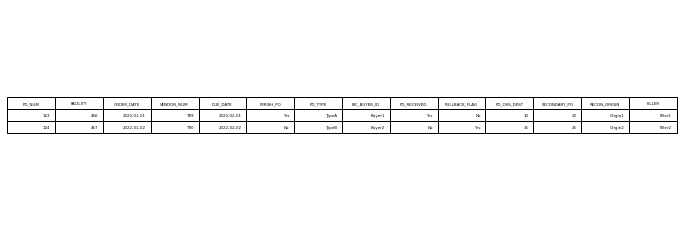

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# df = pd.DataFrame(np.random.random((10,3)), columns = ("col 1", "col 2", "col 3"))

#https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values,colLabels=df.columns,loc='center')

#https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot
pp = PdfPages("foo.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Assuming df is your DataFrame
# df = pd.DataFrame(np.random.random((10, 3)), columns=("col 1", "col 2", "col 3"))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Specify the destination path for the PDF file
destination_path = "D:\\W\\RELEX\\RELEX\\I1674 - Po recon\\foo.pdf"

# Save the figure to the specified destination path
with PdfPages(destination_path) as pdf:
    pdf.savefig(fig, bbox_inches='tight')

# Close the figure
plt.close(fig)


In [1]:
import pandas as pd
import pdfkit

# Assuming df is your DataFrame
df = pd.DataFrame({'col 1': [1, 2, 3], 'col 2': [4, 5, 6], 'col 3': [7, 8, 9]})

# Convert DataFrame to HTML
html_table = df.to_html(classes='table table-bordered table-striped', index=False)

# HTML template
html_template = f"""
<html>
<head>
<style>
    table {{
        width: 100%;
        border-collapse: collapse;
        margin-bottom: 10px;
    }}
    th, td {{
        border: 1px solid black;
        padding: 8px;
        text-align: left;
    }}
</style>
</head>
<body>
    {html_table}
</body>
</html>
"""

# Save HTML to a file
html_file_path = 'table.html'
with open(html_file_path, 'w') as html_file:
    html_file.write(html_template)

# Convert HTML to PDF using pdfkit
pdf_file_path = 'table.pdf'
pdfkit.from_file(html_file_path, pdf_file_path)

# Optional: Remove the temporary HTML file
import os
os.remove(html_file_path)


OSError: No wkhtmltopdf executable found: "b''"
If this file exists please check that this process can read it or you can pass path to it manually in method call, check README. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf

In [6]:
df

,PO_NUM,FACILITY,ORDER_DATE,VENDOR_NUM,DUE_DATE,PERISH_PO,PO_TYPE,BIC_BUYER_ID,PO_RECEIVED,PULLBACK_FLAG,PO_OSS_DEST,SECONDARY_PO,RECON_ORIGIN,FILLER
0,815966,904,220801,137693,230228,N,,JZ,,N,,94187636,O,
1,245345,252,221010,4282,230316,N,,IH,,N,,20076575,O,
2,251735,905,221012,101046,230308,N,,KB,,N,,94192285,O,
3,255347,252,221014,3780,230303,N,,IH,,N,,20076823,O,
4,258466,252,221017,3067,230302,N,,IH,,N,,20076907,O,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,165986,302,230227,4157,230309,Y,,MT,,N,,165986,O,
3171,165985,302,230227,9281,230303,Y,,MT,,N,,165985,O,
3172,165987,302,230227,15326,230303,Y,,MT,,N,,165987,O,
3173,506455,904,230227,161350,230309,N,,H5,,N,,94199635,O,


In [14]:
pip install pdfkit

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
# Example DataFrame
data = {'PO_NUM': [123, 124],
        'FACILITY': [456, 457],
        'ORDER_DATE': ['2022-01-01', '2022-01-02'],
        'VENDOR_NUM': [789, 790],
        'DUE_DATE': ['2022-02-01', '2022-02-02'],
        'PERISH_PO': ['Yes', 'No'],
        'PO_TYPE': ['TypeA', 'TypeB'],
        'BIC_BUYER_ID': ['Buyer1', 'Buyer2'],
        'PO_RECEIVED': ['Yes', 'No'],
        'PULLBACK_FLAG': ['No', 'Yes'],
        'PO_OSS_DEST': [10, 15],
        'SECONDARY_PO': [20, 25],
        'RECON_ORIGIN': ['Origin1', 'Origin2'],
        'FILLER': ['Filler1', 'Filler2']}

df = pd.DataFrame(data)

In [8]:
df


,PO_NUM,FACILITY,ORDER_DATE,VENDOR_NUM,DUE_DATE,PERISH_PO,PO_TYPE,BIC_BUYER_ID,PO_RECEIVED,PULLBACK_FLAG,PO_OSS_DEST,SECONDARY_PO,RECON_ORIGIN,FILLER
0,123,456,2022-01-01,789,2022-02-01,Yes,TypeA,Buyer1,Yes,No,10,20,Origin1,Filler1
1,124,457,2022-01-02,790,2022-02-02,No,TypeB,Buyer2,No,Yes,15,25,Origin2,Filler2


In [4]:

from fpdf import FPDF

from datetime import datetime

import pandas as pd
 
# Function to create PDF

def create_pdf(df):

    # Create instance of FPDF class

    pdf = FPDF()
 
    # Add a page

    pdf.add_page()
 
    # Set font for title

    pdf.set_font("Arial", size=16, style='B')
 
    Add title with center alignment

    pdf.cell(200, 10, txt="This is the title", ln=True, align='C')
 
    # Set font for reference number, date, page number, and time

    pdf.set_font("Arial", size=12)
 
    # Reference number

    pdf.cell(0, 5, txt="REPORT: CSWR602", ln=True)
 
    # Today's date

    today_date = datetime.now().strftime("%Y-%m-%d")

    pdf.cell(0, 5, txt=f"Date: {today_date}", ln=True)
 
    # Page number

    page_number = pdf.page_no()

    pdf.cell(0, 5, txt=f"Page No: {page_number}", ln=True, align='R')
 
    # Current time

    current_time = datetime.now().strftime("%H:%M:%S")

    pdf.cell(0, 5, txt=f"Time: {current_time}", ln=True, align='R')
 
    # Calculate maximum length of column names and values

    max_col_len = max([max(len(str(col)), df[col].astype(str).map(len).max()) for col in df.columns])
 
    # Calculate font size based on maximum length

    font_size = min(8, 170 // max_col_len)  # Limit font size to maximum 8 and ensure it fits within the page width

    pdf.set_font("Arial", size=font_size, style='B')
 
    # Add DataFrame column names

    col_widths = [(len(str(col)) * font_size * 0.3) for col in df.columns]  # Calculate column widths based on font size

    for col, width in zip(df.columns, col_widths):

        pdf.cell(width, 5, str(col), ln=0)

    pdf.ln()
 
    # Set font size for DataFrame values

    pdf.set_font("Arial", size=font_size)
 
    # Add DataFrame values

    for _, row in df.iterrows():

        for col, width in zip(df.columns, col_widths):

            cell_content = str(row[col])

            pdf.cell(width, 5, cell_content, ln=0)

        pdf.ln()
 
    # Save the PDF

    pdf.output("output.pdf")
 
# Example DataFrame

data = {

    'PO_NUM': [123, 124],

    'FACILITY': [456, 457],

    'ORDER_DATE': ['2022-01-01', '2022-01-02'],

    'VENDOR_NUM': [789, 790],

    'DUE_DATE': ['2022-02-01', '2022-02-02'],

    'PERISH_PO': ['Yes', 'No'],

    'PO_TYPE': ['TypeA', 'TypeB'],

    'BIC_BUYER_ID': ['Buyer1', 'Buyer2'],

    'PO_RECEIVED': ['Yes', 'No'],

    'PULLBACK_FLAG': ['No', 'Yes'],

    'PO_OSS_DEST': [10, 15],

    'SECONDARY_PO': [20, 25],

    'RECON_ORIGIN': ['Origin1', 'Origin2'],

    'FILLER': ['Filler1', 'Filler2']

}

df = pd.DataFrame(data)
df_duplicated = df.loc[df.index.repeat(100)].reset_index(drop=True)

# Display the result
# print(df_duplicated)
# Create PDF

create_pdf(df_duplicated)



In [2]:
pip install fpdf

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40713 sha256=91f3584a0c36562ea1733e5b5bef2bf3e8f7f751fbbc87345f61e93da7bb3421
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b4\7f\00\f90ea7c44f8b921477205baa66a7aaf04be398f743ea946fd5
Successfully built fpdf
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [11]:
from fpdf import FPDF
from datetime import datetime
import pandas as pd

# Function to create PDF
def create_pdf(df):
    # Create instance of FPDF class
    pdf = FPDF()

    # Set font for title
    pdf.set_font("Arial", size=16, style='B')

    # Add DataFrame column names
    col_widths = [(len(str(col)) * 6) for col in df.columns]  # Adjust the multiplier as needed
    rows_per_page = 10
    page_number = 1

    def add_page_and_header():
        pdf.add_page()
        pdf.cell(0, 10, txt=f"Page No: {page_number}", ln=True, align='R')
        for col, width in zip(df.columns, col_widths):
            pdf.cell(width, 10, str(col), ln=0)
        pdf.ln()

    add_page_and_header()

    # Set font size for DataFrame values
    pdf.set_font("Arial", size=12)

    # Add DataFrame values
    row_count = 0

    for _, row in df.iterrows():
        if row_count == rows_per_page:
            page_number += 1
            add_page_and_header()
            row_count = 0

        for col, width in zip(df.columns, col_widths):
            cell_content = str(row[col])
            pdf.cell(width, 10, cell_content, ln=0)
        pdf.ln()
        row_count += 1

    # Save the PDF
    pdf.output("output.pdf")



df = pd.DataFrame(data)
df_duplicated = df.loc[df.index.repeat(100)].reset_index(drop=True)

# Create PDF
create_pdf(df_duplicated)


In [20]:
from fpdf import FPDF
from datetime import datetime
import pandas as pd
import random
 
# Function to create PDF
def create_pdf(df):
    # Create instance of FPDF class
    pdf = FPDF()
 
    # Function to add page header
    def header():
        pdf.set_font("Arial", size=12)
        # Title
        pdf.cell(200, 10, txt="This is the title", ln=True, align='C')
 
        # Reference number
        pdf.set_xy(10.0, 15.0)  # Set position for reference number
        pdf.cell(0, 10, txt="REPORT: CSWR602", ln=True)
 
        # Time
        current_time = datetime.now().strftime("%H:%M:%S")
        time_width = pdf.get_string_width(f"Time: {current_time}")
        pdf.set_xy(190.0 - time_width, 15.0)  # Align with top right corner
        pdf.cell(0, 10, txt=f"Time: {current_time}", ln=True, align='R')
 
        # Date
        today_date = datetime.now().strftime("%Y-%m-%d")
        pdf.set_x(10.0)  # Align with reference number
        pdf.cell(0, 10, txt=f"Date: {today_date}", ln=True)
 
        # Page number
        page_number = pdf.page_no()
        page_number_width = pdf.get_string_width(f"Page No: {page_number}")
        pdf.set_xy(190.0 - page_number_width, pdf.get_y()-12)  # Align with top right corner, same line as date
        pdf.cell(0, 10, txt=f"Page No: {page_number}", ln=True, align='R')
        pdf.ln(20)  # Add some space after the header
 
    # Add a page
    pdf.add_page()
    # Add header to the first page
    header()
 
    # Calculate maximum length of column names and values
    max_col_len = max([max(len(str(col)), df[col].astype(str).map(len).max()) for col in df.columns])
 
    # Calculate font size based on maximum length
    font_size = min(4.5, 200 // max_col_len)
 
    # Calculate font size for column names based on the font size for values
    font_size_column = font_size
 
    # Calculate column widths based on font size
    col_widths = [max(len(str(col)), df[col].astype(str).map(len).max()) * font_size * 0.3 for col in df.columns]
 
    # Set font for column names
    pdf.set_font("Arial", size=font_size_column, style='B')
 
    # Add DataFrame column names
    for col, width in zip(df.columns, col_widths):
        pdf.cell(width, 5, str(col), ln=0)
    pdf.ln()
 
    # Set font for values
    pdf.set_font("Arial", size=font_size)
 
    # Add DataFrame values
    for idx, (_, row) in enumerate(df.iterrows(), 1):
        if idx % 10 == 0:  # Check if 10 records have been added
            pdf.add_page()  # Add a new page
            header()  # Add header to the new page
            # Add DataFrame column names on new page
            for col, width in zip(df.columns, col_widths):
                pdf.cell(width, 5, str(col), ln=0)
            pdf.ln()
            # Set font for values
            pdf.set_font("Arial", size=font_size)
        # Add row values
        for col, width in zip(df.columns, col_widths):
            cell_content = str(row[col])
            pdf.cell(width, 5, cell_content, ln=0)
        pdf.ln()
 
    # Save the PDF
    pdf.output("output.pdf")
 
# # Example DataFrame
# data = {
#     'PO_NUM': [123, 124],
#     'FACILITY': [456, 457],
#     'ORDER_DATE': ['2022-01-01', '2022-01-02'],
#     'VENDOR_NUM': [789, 790],
#     'DUE_DATE': ['2022-02-01', '2022-02-02'],
#     'PERISH_PO': ['Yes', 'No'],
#     'PO_TYPE': ['TypeA', 'TypeB'],
#     'BIC_BUYER_ID': ['Buyer1', 'Buyer2'],
#     'PO_RECEIVED': ['Yes', 'No'],
#     'PULLBACK_FLAG': ['No', 'Yes'],
#     'PO_OSS_DEST': [10, 15],
#     'SECONDARY_PO': [20, 25],
#     'RECON_ORIGIN': ['Origin1', 'Origin2'],
#     'FILLER': ['Filler1', 'Filler2']
# }


 
# Add more records to each column
num_records = 200
for key, value in data.items():
    # Generate additional random values for each column
    if isinstance(value[0], int):
        data[key] += [random.randint(100, 999) for _ in range(num_records - len(value))]
    elif isinstance(value[0], str):
        data[key] += [f"Value_{i}" for i in range(len(value), num_records)]
# df = pd.DataFrame(data)
 
# Create PDF
create_pdf(new_df)

In [14]:
data

[(245345,
  252,
  datetime.date(2022, 10, 10),
  4282,
  datetime.date(2023, 3, 16),
  'N',
  '',
  'XX',
  '',
  'N',
  '',
  20076575,
  'O',
  '',
  999,
  'CSPOMS',
  datetime.datetime(2024, 3, 18, 6, 21, 37),
  'CSPOMS',
  datetime.datetime(2024, 3, 18, 6, 21, 37),
  None,
  'Oracle',
  'E',
  'BUYER ID is XX',
  'MainframeIN600'),
 (251735,
  905,
  datetime.date(2022, 10, 12),
  777777,
  datetime.date(2023, 3, 8),
  'N',
  '',
  'KB',
  '',
  'N',
  '',
  94192285,
  'O',
  '',
  999,
  'CSPOMS',
  datetime.datetime(2024, 3, 18, 6, 21, 37),
  'CSPOMS',
  datetime.datetime(2024, 3, 18, 6, 21, 37),
  None,
  'Oracle',
  'E',
  'Buyer Vendor is 777777',
  'MainframeIN600'),
 (251735,
  905,
  datetime.date(2022, 10, 12),
  101046,
  datetime.date(1977, 11, 11),
  'N',
  '',
  'KB',
  '',
  'N',
  '',
  94192285,
  'O',
  '',
  999,
  'CSPOMS',
  datetime.datetime(2024, 3, 15, 6, 14, 45),
  'CSPOMS',
  datetime.datetime(2024, 3, 15, 6, 14, 45),
  None,
  'Oracle',
  'E',
  'Due Da

In [8]:
post_cur.execute("""SELECT * FROM XXPO_PO_RECON_INBOUND_STG WHERE process_status = 'E'""")
data = post_cur.fetchall()
data
# Get column names from the cursor description
column_names = [desc[0] for desc in post_cur.description]
print(column_names)
df = pd.DataFrame(data, columns=column_names)
df

['po_num', 'facility', 'order_date', 'vendor_num', 'due_date', 'perish_po', 'po_type', 'bic_buyer_id', 'po_received', 'pullback_flag', 'po_oss_dest', 'secondary_po', 'recon_origin', 'filler', 'request_id', 'created_by', 'creation_date', 'last_updated_by', 'last_update_date', 'last_update_login', 'inbound_source', 'process_status', 'error_message', 'file_name']


,po_num,facility,order_date,vendor_num,due_date,perish_po,po_type,bic_buyer_id,po_received,pullback_flag,...,request_id,created_by,creation_date,last_updated_by,last_update_date,last_update_login,inbound_source,process_status,error_message,file_name
0,245345,252,2022-10-10,4282,2023-03-16,N,,XX,,N,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,BUYER ID is XX,MainframeIN600
1,251735,905,2022-10-12,777777,2023-03-08,N,,KB,,N,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,Buyer Vendor is 777777,MainframeIN600
2,251735,905,2022-10-12,101046,1977-11-11,N,,KB,,N,...,999,CSPOMS,2024-03-15 06:14:45,CSPOMS,2024-03-15 06:14:45,None,Oracle,E,Due Date is 1977-11-11,MainframeIN600
3,258466,252,2022-10-17,3067,2023-03-02,Y,,IH,,Y,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,Pullback FLag is Y,MainframeIN600
4,255347,777,2022-10-14,3780,2023-03-03,N,,IH,,N,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,Facility is 777,MainframeIN600
5,255347,777,2022-10-14,3780,2023-03-03,N,,IH,,N,...,999,CSPOMS,2024-03-15 06:14:45,CSPOMS,2024-03-15 06:14:45,None,Oracle,E,Facility is 777,MainframeIN600
6,258466,252,2024-10-14,3067,2023-03-02,Y,,IH,,N,...,999,CSPOMS,2024-03-15 06:14:45,CSPOMS,2024-03-15 06:14:45,None,Oracle,E,Arrival Date is 2024-10-14,MainframeIN600
7,258466,252,2022-10-17,3067,2023-03-02,N,,IH,,Y,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,Perishable flag is N,MainframeIN600
8,258466,252,2024-10-14,3067,2023-03-02,N,,IH,,N,...,999,CSPOMS,2024-03-15 06:14:45,CSPOMS,2024-03-15 06:14:45,None,Oracle,E,Arrival Date is 2024-10-14,MainframeIN600


In [13]:
from fpdf import FPDF
from datetime import datetime
import pandas as pd

# Function to create PDF
def create_pdf(df):
    # Create instance of FPDF class
    pdf = FPDF()

    # Add a page
    pdf.add_page()

    # Set font
    pdf.set_font("Arial", size=12)

    # Add title
    pdf.cell(200, 10, txt="Error Records Report", ln=True, align='C')
    pdf.ln(10)  # Add a new line

    # Add timestamp
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    pdf.cell(200, 10, txt=f"Generated on: {timestamp}", ln=True, align='C')
    pdf.ln(10)  # Add a new line

    # Add DataFrame to PDF
    col_width = 40  # Adjust based on your data
    for col in df.columns:
        pdf.cell(col_width, 10, txt=col, ln=True, align='C')  # Add column headers

    for _, row in df.iterrows():
        for col in df.columns:
            pdf.cell(col_width, 10, txt=str(row[col]), ln=True, align='C')  # Add row values

    # Save the PDF
    pdf.output("error_records_report.pdf")

# Example usage:
# Assuming `df` is your DataFrame containing the error records
create_pdf(df)


In [16]:
# Example DataFrame
data = {
    'PO_NUM': [123, 124],
    'FACILITY': [456, 457],
    'ORDER_DATE': ['2022-01-01', '2022-01-02'],
    'VENDOR_NUM': [789, 790],
    'DUE_DATE': ['2022-02-01', '2022-02-02'],
    'PERISH_PO': ['Yes', 'No'],
    'PO_TYPE': ['TypeA', 'TypeB'],
    'BIC_BUYER_ID': ['Buyer1', 'Buyer2'],
    'PO_RECEIVED': ['Yes', 'No'],
    'PULLBACK_FLAG': ['No', 'Yes'],
    'PO_OSS_DEST': [10, 15],
    'SECONDARY_PO': [20, 25],
    'RECON_ORIGIN': ['Origin1', 'Origin2'],
    'FILLER': ['Filler1', 'Filler2']
}
data

{'PO_NUM': [123, 124],
 'FACILITY': [456, 457],
 'ORDER_DATE': ['2022-01-01', '2022-01-02'],
 'VENDOR_NUM': [789, 790],
 'DUE_DATE': ['2022-02-01', '2022-02-02'],
 'PERISH_PO': ['Yes', 'No'],
 'PO_TYPE': ['TypeA', 'TypeB'],
 'BIC_BUYER_ID': ['Buyer1', 'Buyer2'],
 'PO_RECEIVED': ['Yes', 'No'],
 'PULLBACK_FLAG': ['No', 'Yes'],
 'PO_OSS_DEST': [10, 15],
 'SECONDARY_PO': [20, 25],
 'RECON_ORIGIN': ['Origin1', 'Origin2'],
 'FILLER': ['Filler1', 'Filler2']}

In [17]:
df

,po_num,facility,order_date,vendor_num,due_date,perish_po,po_type,bic_buyer_id,po_received,pullback_flag,...,request_id,created_by,creation_date,last_updated_by,last_update_date,last_update_login,inbound_source,process_status,error_message,file_name
0,245345,252,2022-10-10,4282,2023-03-16,N,,XX,,N,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,BUYER ID is XX,MainframeIN600
1,251735,905,2022-10-12,777777,2023-03-08,N,,KB,,N,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,Buyer Vendor is 777777,MainframeIN600
2,251735,905,2022-10-12,101046,1977-11-11,N,,KB,,N,...,999,CSPOMS,2024-03-15 06:14:45,CSPOMS,2024-03-15 06:14:45,None,Oracle,E,Due Date is 1977-11-11,MainframeIN600
3,258466,252,2022-10-17,3067,2023-03-02,Y,,IH,,Y,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,Pullback FLag is Y,MainframeIN600
4,255347,777,2022-10-14,3780,2023-03-03,N,,IH,,N,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,Facility is 777,MainframeIN600
5,255347,777,2022-10-14,3780,2023-03-03,N,,IH,,N,...,999,CSPOMS,2024-03-15 06:14:45,CSPOMS,2024-03-15 06:14:45,None,Oracle,E,Facility is 777,MainframeIN600
6,258466,252,2024-10-14,3067,2023-03-02,Y,,IH,,N,...,999,CSPOMS,2024-03-15 06:14:45,CSPOMS,2024-03-15 06:14:45,None,Oracle,E,Arrival Date is 2024-10-14,MainframeIN600
7,258466,252,2022-10-17,3067,2023-03-02,N,,IH,,Y,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,Perishable flag is N,MainframeIN600
8,258466,252,2024-10-14,3067,2023-03-02,N,,IH,,N,...,999,CSPOMS,2024-03-15 06:14:45,CSPOMS,2024-03-15 06:14:45,None,Oracle,E,Arrival Date is 2024-10-14,MainframeIN600


In [9]:

# Copy the DataFrame 10 times
df_list = [df.copy() for _ in range(10)]

# Concatenate the copies into a new DataFrame
new_df = pd.concat(df_list, ignore_index=True)

# Display the new DataFrame
print(new_df)

    po_num  facility  order_date  vendor_num    due_date perish_po po_type  \
0   245345       252  2022-10-10        4282  2023-03-16         N           
1   251735       905  2022-10-12      777777  2023-03-08         N           
2   251735       905  2022-10-12      101046  1977-11-11         N           
3   258466       252  2022-10-17        3067  2023-03-02         Y           
4   255347       777  2022-10-14        3780  2023-03-03         N           
..     ...       ...         ...         ...         ...       ...     ...   
85  255347       777  2022-10-14        3780  2023-03-03         N           
86  255347       777  2022-10-14        3780  2023-03-03         N           
87  258466       252  2024-10-14        3067  2023-03-02         Y           
88  258466       252  2022-10-17        3067  2023-03-02         N           
89  258466       252  2024-10-14        3067  2023-03-02         N           

   bic_buyer_id po_received pullback_flag  ... request_id  crea

In [21]:
# Function to create PDF
def create_pdf(df):
    # Create instance of FPDF class
    pdf = FPDF()
 
    # Function to add page header
    def header():
        pdf.set_font("Arial", size=12)
        # Title
        pdf.cell(200, 10, txt="This is the title", ln=True, align='C')
 
        # Reference number
        pdf.set_xy(10.0, 15.0)  # Set position for reference number
        pdf.cell(0, 10, txt="REPORT: CSWR602", ln=True)
 
        # Time
        current_time = datetime.now().strftime("%H:%M:%S")
        time_width = pdf.get_string_width(f"Time: {current_time}")
        pdf.set_xy(190.0 - time_width, 15.0)  # Align with top right corner
        pdf.cell(0, 10, txt=f"Time: {current_time}", ln=True, align='R')
 
        # Date
        today_date = datetime.now().strftime("%Y-%m-%d")
        pdf.set_x(10.0)  # Align with reference number
        pdf.cell(0, 10, txt=f"Date: {today_date}", ln=True)
 
        # Page number
        page_number = pdf.page_no()
        page_number_width = pdf.get_string_width(f"Page No: {page_number}")
        pdf.set_xy(190.0 - page_number_width, pdf.get_y()-12)  # Align with top right corner, same line as date
        pdf.cell(0, 10, txt=f"Page No: {page_number}", ln=True, align='R')
        pdf.ln(20)  # Add some space after the header
 
    # Add a page
    pdf.add_page()
    # Add header to the first page
    header()
 
    # Calculate maximum length of column names and values
    max_col_len = max([max(len(str(col)), df[col].astype(str).map(len).max()) for col in df.columns])
 
    # Calculate font size based on maximum length
    font_size = min(4.5, 200 // max_col_len)
 
    # Calculate font size for column names based on the font size for values
    font_size_column = font_size
 
    # Calculate column widths based on font size
    col_widths = [max(len(str(col)), df[col].astype(str).map(len).max()) * font_size * 0.3 for col in df.columns]
 
    # Set font for column names
    pdf.set_font("Arial", size=font_size_column, style='B')
 
    # Add DataFrame column names
    for col, width in zip(df.columns, col_widths):
        pdf.cell(width, 5, str(col), ln=0)
    pdf.ln()
 
    # Set font for values
    pdf.set_font("Arial", size=font_size)
 
    # Add DataFrame values
    for idx, (_, row) in enumerate(df.iterrows(), 1):
        # Check if 10 records have been added or if it's the first row
        if idx % 10 == 1 or idx == 1:
            pdf.add_page()  # Add a new page
            header()  # Add header to the new page
            # Add DataFrame column names on new page
            for col, width in zip(df.columns, col_widths):
                pdf.cell(width, 5, str(col), ln=0)
            pdf.ln()
            # Set font for values
            pdf.set_font("Arial", size=font_size)
        # Add row values
        for col, width in zip(df.columns, col_widths):
            cell_content = str(row[col])
            pdf.cell(width, 5, cell_content, ln=0)
        pdf.ln()
 
    # Save the PDF
    pdf.output("output.pdf")
create_pdf(new_df)

In [44]:
# Function to create PDF
def create_pdf(df):
    # Create instance of FPDF class
    pdf = FPDF()
 
    # Function to add page header
    def header():
        pdf.set_font("Arial", size=12)
        # Title
        pdf.cell(200, 10, txt="OPEN PO EXCEPTIONS BETWEEN ORACLE AND BICEPS", ln=True, align='C')
 
        # Reference number
        pdf.set_xy(10.0, 15.0)  # Set position for reference number
        pdf.cell(0, 10, txt="REPORT: CSWR602", ln=True)
 
        # Time
        current_time = datetime.now().strftime("%H:%M:%S")
        time_width = pdf.get_string_width(f"Time: {current_time}")
        pdf.set_xy(190.0 - time_width, 15.0)  # Align with top right corner
        pdf.cell(0, 10, txt=f"Time: {current_time}", ln=True, align='R')
 
        # Date
        today_date = datetime.now().strftime("%Y-%m-%d")
        pdf.set_x(10.0)  # Align with reference number
        pdf.cell(0, 10, txt=f"Date: {today_date}", ln=True)
 
        # Page number
        page_number = pdf.page_no()
        page_number_width = pdf.get_string_width(f"Page No: {page_number}")
        pdf.set_xy(190.0 - page_number_width, pdf.get_y()-12)  # Align with top right corner, same line as date
        pdf.cell(0, 10, txt=f"Page No: {page_number}", ln=True, align='R')
        pdf.ln(20)  # Add some space after the header
 
    # Calculate maximum length of column names and values
    max_col_len = max([max(len(str(col)), df[col].astype(str).map(len).max()) for col in df.columns])
 
    # Calculate font size based on maximum length
    font_size = min(4.5, 200 // max_col_len)
 
    # Calculate font size for column names based on the font size for values
    font_size_column = font_size
 
    # Calculate column widths based on font size
    col_widths = [max(len(str(col)), df[col].astype(str).map(len).max()) * font_size * 0.3 for col in df.columns]
 
    # Set font for column names
    pdf.set_font("Arial", size=5, style='B')
 
    # Add a page
    pdf.add_page()
    # Add header to the first page
    header()
 
    # Add DataFrame column names
    for col, width in zip(df.columns, col_widths):
        pdf.cell(width, 3, str(col), ln=0)
    pdf.ln()
 
    # Set font for values
    pdf.set_font("Arial", size=20)
 
    # Add DataFrame values
    for idx, (_, row) in enumerate(df.iterrows(), 1):
        # Add a new page if the number of records exceeds the page limit or if it's the first row
        if idx % 50 == 0 or idx == 1:
            pdf.add_page()  # Add a new page
            header()  # Add header to the new page
            # Add DataFrame column names on new page
            for col, width in zip(df.columns, col_widths):
                pdf.cell(width, 5, str(col), ln=0)
            pdf.ln()
            # Set font for values
            pdf.set_font("Arial", size=font_size)
        # Add row values
        for col, width in zip(df.columns, col_widths):
            cell_content = str(row[col])
            pdf.cell(width, 5, cell_content, ln=0)
        pdf.ln()
 
    # Save the PDF
    pdf.output("output.pdf")
create_pdf(new_df)

In [45]:
# Function to create PDF
def create_pdf(df, font_size_header=12, font_size_values=12):
    # Create instance of FPDF class
    pdf = FPDF()
 
    # Function to add page header
    def header():
        pdf.set_font("Arial", size=font_size_header)
        # Title
        pdf.cell(200, 10, txt="This is the title", ln=True, align='C')
 
        # Reference number
        pdf.set_xy(10.0, 15.0)  # Set position for reference number
        pdf.cell(0, 10, txt="REPORT: CSWR602", ln=True)
 
        # Time
        current_time = datetime.now().strftime("%H:%M:%S")
        time_width = pdf.get_string_width(f"Time: {current_time}")
        pdf.set_xy(190.0 - time_width, 15.0)  # Align with top right corner
        pdf.cell(0, 10, txt=f"Time: {current_time}", ln=True, align='R')
 
        # Date
        today_date = datetime.now().strftime("%Y-%m-%d")
        pdf.set_x(10.0)  # Align with reference number
        pdf.cell(0, 10, txt=f"Date: {today_date}", ln=True)
 
        # Page number
        page_number = pdf.page_no()
        page_number_width = pdf.get_string_width(f"Page No: {page_number}")
        pdf.set_xy(190.0 - page_number_width, pdf.get_y()-12)  # Align with top right corner, same line as date
        pdf.cell(0, 10, txt=f"Page No: {page_number}", ln=True, align='R')
        pdf.ln(20)  # Add some space after the header
 
    # Calculate maximum length of column names and values
    max_col_len = max([max(len(str(col)), df[col].astype(str).map(len).max()) for col in df.columns])
 
    # Calculate font size based on maximum length
    font_size = min(4.5, 200 // max_col_len)
 
    # Calculate column widths based on font size
    col_widths = [max(len(str(col)), df[col].astype(str).map(len).max()) * font_size * 0.3 for col in df.columns]
 
    # Set font for column names
    pdf.set_font("Arial", size=font_size_header, style='B')
 
    # Add a page
    pdf.add_page()
    # Add header to the first page
    header()
 
    # Add DataFrame column names
    for col, width in zip(df.columns, col_widths):
        pdf.cell(width, 5, str(col), ln=0)
    pdf.ln()
 
    # Set font for values
    pdf.set_font("Arial", size=font_size_values)
 
    # Add DataFrame values
    for idx, (_, row) in enumerate(df.iterrows(), 1):
        # Add a new page if the number of records exceeds the page limit or if it's the first row
        if idx % 50 == 0 or idx == 1:
            pdf.add_page()  # Add a new page
            header()  # Add header to the new page
            # Add DataFrame column names on new page
            for col, width in zip(df.columns, col_widths):
                pdf.cell(width, 5, str(col), ln=0)
            pdf.ln()
            # Set font for values
            pdf.set_font("Arial", size=font_size_values)
        # Add row values
        for col, width in zip(df.columns, col_widths):
            cell_content = str(row[col])
            pdf.cell(width, 5, cell_content, ln=0)
        pdf.ln()
 
    # Save the PDF
    pdf.output("output.pdf")
create_pdf(new_df,7,7)

In [48]:
for i in df.columns:
    print(i)

po_num
facility
order_date
vendor_num
due_date
perish_po
po_type
bic_buyer_id
po_received
pullback_flag
po_oss_dest
secondary_po
recon_origin
filler
request_id
created_by
creation_date
last_updated_by
last_update_date
last_update_login
inbound_source
process_status
error_message
file_name


In [63]:
# Mapping of old column names to new column names
column_name_mapping = {
    'po_num': 'ORDER',
    'secondary_po':'SECONDARY',
    'recon_origin':'ORIGIN',
    'facility': 'DST',
    'bic_buyer_id': 'TP',
    'New_Order_Date_Column_Name':'ORDERED',
    'due_date':'ARRIVAL',
    'creation_date':'APPT',
    
    # Add more mappings for other columns as needed
}

df = df.rename(columns=column_name_mapping)
df

,ORDER,DST,ORDERED,vendor_num,ARRIVAL,perish_po,po_type,TP,po_received,pullback_flag,...,request_id,created_by,APPT,last_updated_by,last_update_date,last_update_login,inbound_source,process_status,error_message,file_name
0,245345,252,2022-10-10,4282,2023-03-16,N,,XX,,N,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,BUYER ID is XX,MainframeIN600
1,251735,905,2022-10-12,777777,2023-03-08,N,,KB,,N,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,Buyer Vendor is 777777,MainframeIN600
2,251735,905,2022-10-12,101046,1977-11-11,N,,KB,,N,...,999,CSPOMS,2024-03-15 06:14:45,CSPOMS,2024-03-15 06:14:45,None,Oracle,E,Due Date is 1977-11-11,MainframeIN600
3,258466,252,2022-10-17,3067,2023-03-02,Y,,IH,,Y,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,Pullback FLag is Y,MainframeIN600
4,255347,777,2022-10-14,3780,2023-03-03,N,,IH,,N,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,Facility is 777,MainframeIN600
5,255347,777,2022-10-14,3780,2023-03-03,N,,IH,,N,...,999,CSPOMS,2024-03-15 06:14:45,CSPOMS,2024-03-15 06:14:45,None,Oracle,E,Facility is 777,MainframeIN600
6,258466,252,2024-10-14,3067,2023-03-02,Y,,IH,,N,...,999,CSPOMS,2024-03-15 06:14:45,CSPOMS,2024-03-15 06:14:45,None,Oracle,E,Arrival Date is 2024-10-14,MainframeIN600
7,258466,252,2022-10-17,3067,2023-03-02,N,,IH,,Y,...,999,CSPOMS,2024-03-18 06:21:37,CSPOMS,2024-03-18 06:21:37,None,Oracle,E,Perishable flag is N,MainframeIN600
8,258466,252,2024-10-14,3067,2023-03-02,N,,IH,,N,...,999,CSPOMS,2024-03-15 06:14:45,CSPOMS,2024-03-15 06:14:45,None,Oracle,E,Arrival Date is 2024-10-14,MainframeIN600


In [64]:
# List of selected column names
selected_columns = ['ORDER', 'SECONDARY', 'ORIGIN','DST','TP','ORDERED','ARRIVAL','APPT']

# Select only the specified columns
df = df[selected_columns]
df

,ORDER,SECONDARY,ORIGIN,DST,TP,ORDERED,ARRIVAL,APPT
0,245345,20076575,O,252,XX,2022-10-10,2023-03-16,2024-03-18 06:21:37
1,251735,94192285,O,905,KB,2022-10-12,2023-03-08,2024-03-18 06:21:37
2,251735,94192285,O,905,KB,2022-10-12,1977-11-11,2024-03-15 06:14:45
3,258466,20076907,O,252,IH,2022-10-17,2023-03-02,2024-03-18 06:21:37
4,255347,20076823,O,777,IH,2022-10-14,2023-03-03,2024-03-18 06:21:37
5,255347,20076823,O,777,IH,2022-10-14,2023-03-03,2024-03-15 06:14:45
6,258466,20076907,O,252,IH,2024-10-14,2023-03-02,2024-03-15 06:14:45
7,258466,20076907,O,252,IH,2022-10-17,2023-03-02,2024-03-18 06:21:37
8,258466,20076907,O,252,IH,2024-10-14,2023-03-02,2024-03-15 06:14:45


In [36]:
from fpdf import FPDF
from datetime import datetime
import pandas as pd
import random

# Function to create PDF
def create_pdf(df, font_size_header=12, font_size_values=12):
    # Create instance of FPDF class
    pdf = FPDF()

        # Function to add page header
    def header():
        pdf.set_font("Arial", size=font_size_header)
        # Title
        pdf.cell(200, 10, txt="This is the title", ln=True, align='C')

        # Reference number
        pdf.set_xy(10.0, 15.0)  # Set position for reference number
        pdf.cell(0, 10, txt="REPORT: CSWR602", ln=True)

        # Time
        current_time = datetime.now().strftime("%H:%M:%S")
        time_width = pdf.get_string_width(f"Time: {current_time}")
        pdf.set_xy(190.0 - time_width, 15.0)  # Align with top right corner
        pdf.cell(0, 10, txt=f"Time: {current_time}", ln=True, align='R')

        # Date
        today_date = datetime.now().strftime("%Y-%m-%d")
        date_width = pdf.get_string_width(f"Date: {today_date}")
        pdf.set_xy(190.0 - date_width, pdf.get_y() + 5)  # Align with top right corner, same line as reference number
        pdf.cell(0, 10, txt=f"Date: {today_date}", ln=True, align='R')

        # Page number
        page_number = pdf.page_no()
        page_number_width = pdf.get_string_width(f"Page No: {page_number}")
        pdf.set_xy(190.0 - page_number_width, pdf.get_y() + 5)  # Align with top right corner, same line as date
        pdf.cell(0, 10, txt=f"Page No: {page_number}", ln=True, align='R')
        pdf.ln(20)  # Add some space after the header

        # Add DataFrame column names
        for col, width in zip(df.columns, col_widths):
            pdf.cell(width, 5, str(col), ln=0)
        pdf.ln()

    # Add a page
    pdf.add_page()
    # Add header to the first page
    header()

    # Calculate maximum length of column names and values
    max_col_len = max([max(len(str(col)), df[col].astype(str).map(len).max()) for col in df.columns])

    # Calculate font size based on maximum length
    font_size = min(4.5, 200 // max_col_len)

    # Calculate font size for column names based on the font size for values
    font_size_column = font_size

    # Calculate column widths based on font size
    col_widths = [max(len(str(col)), df[col].astype(str).map(len).max()) * font_size * 0.3 for col in df.columns]

    # Set font for column names
    pdf.set_font("Arial", size=font_size_column, style='B')

    # Add DataFrame column names
    for col, width in zip(df.columns, col_widths):
        pdf.cell(width, 5, str(col), ln=0)
    pdf.ln()

    # Set font for values
    pdf.set_font("Arial", size=font_size_values)

    # Add DataFrame values
    for idx, (_, row) in enumerate(df.iterrows(), 1):
        if idx % 10 == 0:  # Check if 10 records have been added
            pdf.add_page()  # Add a new page
            header()  # Add header to the new page
            # Add DataFrame column names on new page
            for col, width in zip(df.columns, col_widths):
                pdf.cell(width, 5, str(col), ln=0)
            pdf.ln()
            # Set font for values
            pdf.set_font("Arial", size=font_size_values)
        # Add row values
        for col, width in zip(df.columns, col_widths):
            cell_content = str(row[col])
            pdf.cell(width, 5, cell_content, ln=0)
        pdf.ln()

    # Save the PDF
    pdf.output("output.pdf")


# # Add more records to each column
# num_records = 200
# for key, value in data.items():
#     # Generate additional random values for each column
#     if isinstance(value[0], int):
#         data[key] += [random.randint(100, 999) for _ in range(num_records - len(value))]
#     elif isinstance(value[0], str):
#         data[key] += [f"Value_{i}" for i in range(len(value), num_records)]


# Create PDF with parameterized font sizes
create_pdf(new_df, font_size_header=1, font_size_values=3)


NameError: free variable 'col_widths' referenced before assignment in enclosing scope

In [42]:
from fpdf import FPDF
from datetime import datetime
import pandas as pd
import random

# Function to create PDF
def create_pdf(df, font_size_header, font_size):
    # Create instance of FPDF class
    pdf = FPDF()

    # Function to add page header
    def header(col_widths):
        pdf.set_font("Arial", size=font_size_header)
        # Title
        pdf.cell(200, 10, txt="This is the title", ln=True, align='C')

        # Reference number
        pdf.set_xy(10.0, 15.0)  # Set position for reference number
        pdf.cell(0, 10, txt="REPORT: CSWR602", ln=True)

        # Time
        current_time = datetime.now().strftime("%H:%M:%S")
        time_width = pdf.get_string_width(f"Time: {current_time}")
        pdf.set_xy(190.0 - time_width, 15.0)  # Align with top right corner
        pdf.cell(0, 10, txt=f"Time: {current_time}", ln=True, align='R')

        # Date
        today_date = datetime.now().strftime("%Y-%m-%d")
        date_width = pdf.get_string_width(f"Date: {today_date}")
        pdf.set_xy(190.0 - date_width, pdf.get_y() + 5)  # Align with top right corner, same line as reference number
        pdf.cell(0, 10, txt=f"Date: {today_date}", ln=True, align='R')

        # Page number
        page_number = pdf.page_no()
        page_number_width = pdf.get_string_width(f"Page No: {page_number}")
        pdf.set_xy(190.0 - page_number_width, pdf.get_y() + 5)  # Align with top right corner, same line as date
        pdf.cell(0, 10, txt=f"Page No: {page_number}", ln=True, align='R')
        pdf.ln(20)  # Add some space after the header

        # Add DataFrame column names
        for col, width in zip(df.columns, col_widths):
            pdf.cell(width, 5, str(col), ln=0)
        pdf.ln()

    # Add a page
    pdf.add_page()
    # Calculate maximum length of column names and values
    max_col_len = max([max(len(str(col)), df[col].astype(str).map(len).max()) for col in df.columns])

    # Calculate font size based on maximum length
    font_size = min(4.5, 200 // max_col_len)

    # Calculate font size for column names based on the font size for values
    font_size_column = font_size

    # Calculate column widths based on font size
    col_widths = [max(len(str(col)), df[col].astype(str).map(len).max()) * font_size * 0.3 for col in df.columns]

    # Add header to the first page
    header(col_widths)

    # Set font for values
    pdf.set_font("Arial", size=font_size)

    # Add DataFrame values
    for idx, (_, row) in enumerate(df.iterrows(), 1):
        if idx % 10 == 0:  # Check if 10 records have been added
            pdf.add_page()  # Add a new page
            header(col_widths)  # Add header to the new page
        # Add row values
        for width in col_widths:
            pdf.cell(width, 5, str(row[col]), ln=0)
        pdf.ln()

    # Save the PDF
    pdf.output("output.pdf")
    
create_pdf(new_df, 5,5)

NameError: name 'col' is not defined

In [67]:
def create_pdf(df, font_size_header=12, font_size_values=12):
    # Create instance of FPDF class
    pdf = FPDF()
    # Function to add page header
    def header():
        pdf.set_font("Arial", size=font_size_header)
        # Title
        pdf.cell(200, 10, txt="This is the title", ln=True, align='C')
        # Reference number
        pdf.set_xy(10.0, 15.0)  # Set position for reference number
        pdf.cell(0, 10, txt="REPORT: CSWR602", ln=True)
        # Time
        current_time = datetime.now().strftime("%H:%M:%S")
        time_width = pdf.get_string_width(f"Time: {current_time}")
        pdf.set_xy(190.0 - time_width, 15.0)  # Align with top right corner
        pdf.cell(0, 10, txt=f"Time: {current_time}", ln=True, align='R')
        # Date
        today_date = datetime.now().strftime("%Y-%m-%d")
        pdf.set_x(10.0)  # Align with reference number
        pdf.cell(0, 10, txt=f"Date: {today_date}", ln=True)
        # Page number
        page_number = pdf.page_no()
        page_number_width = pdf.get_string_width(f"Page No: {page_number}")
        pdf.set_xy(190.0 - page_number_width, pdf.get_y()-12)  # Align with top right corner, same line as date
        pdf.cell(0, 10, txt=f"Page No: {page_number}", ln=True, align='R')
        pdf.ln(20)  # Add some space after the header
    # Calculate maximum length of column names and values
    max_col_len = max([max(len(str(col)), df[col].astype(str).map(len).max()) for col in df.columns])
    # Calculate font size based on maximum length
    font_size = min(4.5, 200 // max_col_len)
    # Calculate column widths based on font size
    col_widths = [max(len(str(col)), df[col].astype(str).map(len).max()) * font_size * 0.3 for col in df.columns]
    # Set font for column names
    pdf.set_font("Arial", size=font_size_header, style='B')
    # Add a page
    pdf.add_page()
    # Add header to the first page
    header()
    # Add DataFrame column names
    for col, width in zip(df.columns, col_widths):
        pdf.cell(width, 5, str(col), ln=0)
    pdf.ln()
    # Set font for values
    pdf.set_font("Arial", size=font_size_values)
    # Add DataFrame values
    records_per_page = 30  # Number of records per page
    for idx, (_, row) in enumerate(df.iterrows(), 1):
        # Add a new page if the number of records exceeds the page limit
        if idx % records_per_page == 0:
            pdf.add_page()  # Add a new page
            header()  # Add header to the new page
            # Add DataFrame column names on new page
            for col, width in zip(df.columns, col_widths):
                pdf.cell(width, 5, str(col), ln=0)
            pdf.ln()
            # Set font for values
            pdf.set_font("Arial", size=font_size_values)
        # Add row values
        for col, width in zip(df.columns, col_widths):
            cell_content = str(row[col])
            pdf.cell(width, 5, cell_content, ln=0)
        pdf.ln()
    # Save the PDF
    pdf.output("output.pdf")
create_pdf(new_df, 7
           , 7)

In [66]:
new_df

,ORDER,SECONDARY,ORIGIN,DST,TP,ORDERED,ARRIVAL,APPT
0,245345,20076575,O,252,XX,2022-10-10,2023-03-16,2024-03-18 06:21:37
1,251735,94192285,O,905,KB,2022-10-12,2023-03-08,2024-03-18 06:21:37
2,251735,94192285,O,905,KB,2022-10-12,1977-11-11,2024-03-15 06:14:45
3,258466,20076907,O,252,IH,2022-10-17,2023-03-02,2024-03-18 06:21:37
4,255347,20076823,O,777,IH,2022-10-14,2023-03-03,2024-03-18 06:21:37
...,...,...,...,...,...,...,...,...
85,255347,20076823,O,777,IH,2022-10-14,2023-03-03,2024-03-18 06:21:37
86,255347,20076823,O,777,IH,2022-10-14,2023-03-03,2024-03-15 06:14:45
87,258466,20076907,O,252,IH,2024-10-14,2023-03-02,2024-03-15 06:14:45
88,258466,20076907,O,252,IH,2022-10-17,2023-03-02,2024-03-18 06:21:37


In [12]:
from fpdf import FPDF
from datetime import datetime
import pandas as pd
import random

def create_pdf(df, font_size_header=12, font_size_values=12):
    # Create instance of FPDF class
    pdf = FPDF()
    # Function to add page header
    def header():
        pdf.set_font("Arial", size=font_size_header)
        # Title
        pdf.cell(200, 10, txt="This is the title", ln=True, align='C')
        # Reference number
        pdf.set_xy(10.0, 15.0)  # Set position for reference number
        pdf.cell(0, 10, txt="REPORT: CSWR602", ln=True)
        # Time
        current_time = datetime.now().strftime("%H:%M:%S")
        time_width = pdf.get_string_width(f"Time: {current_time}")
        pdf.set_xy(190.0 - time_width, 15.0)  # Align with top right corner
        pdf.cell(0, 10, txt=f"Time: {current_time}", ln=True, align='R')
        # Date
        today_date = datetime.now().strftime("%Y-%m-%d")
        pdf.set_x(10.0)  # Align with reference number
        pdf.cell(0, 10, txt=f"Date: {today_date}", ln=True)
        # Page number
        page_number = pdf.page_no()
        page_number_width = pdf.get_string_width(f"Page No: {page_number}")
        pdf.set_xy(190.0 - page_number_width, pdf.get_y()-12)  # Align with top right corner, same line as date
        pdf.cell(0, 10, txt=f"Page No: {page_number}", ln=True, align='R')
        pdf.ln(20)  # Add some space after the header
    # Calculate maximum length of column names and values
    max_col_len = max([max(len(str(col)), df[col].astype(str).map(len).max()) for col in df.columns])
    # Calculate font size based on maximum length
    font_size = min(4.5, 200 // max_col_len)
    # Calculate column widths based on font size
    col_widths = [max(len(str(col)), df[col].astype(str).map(len).max()) * font_size * 0.3 for col in df.columns]
    # Set font for column names
    pdf.set_font("Arial", size=font_size_header, style='B')
    # Add a page
    pdf.add_page()
    # Add header to the first page
    header()
    # Add DataFrame column names
    for col, width in zip(df.columns, col_widths):
        pdf.cell(width, 5, str(col), ln=0)
    pdf.ln()
    # Set font for values
    pdf.set_font("Arial", size=font_size_values)
    # Add DataFrame values
    records_per_page = 30  # Number of records per page
    for idx, (_, row) in enumerate(df.iterrows(), 1):
        # Add a new page if the number of records exceeds the page limit
        if idx % records_per_page == 0:
            pdf.add_page()  # Add a new page
            header()  # Add header to the new page
            # Add DataFrame column names on new page
            for col, width in zip(df.columns, col_widths):
                pdf.cell(width, 5, str(col), ln=0)
            pdf.ln()
            # Set font for values
            pdf.set_font("Arial", size=font_size_values)
        # Add row values
        for col, width in zip(df.columns, col_widths):
            cell_content = str(row[col])
            pdf.cell(width, 5, cell_content, ln=0)
        pdf.ln()
    # Save the PDF
    pdf.output("output.pdf")

create_pdf(new_df, 7, 4)